# Variation of Sample

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [7]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  11.9095195082
sample SD is  5.72861204222


## Empirical Distribution of mean

In [8]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [9]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

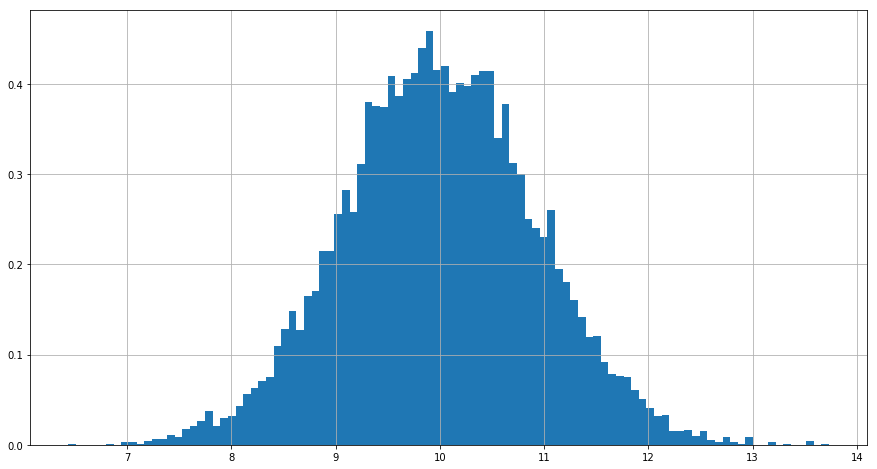

In [11]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

## Sampling from arbritary distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bfbe87470>]], dtype=object)

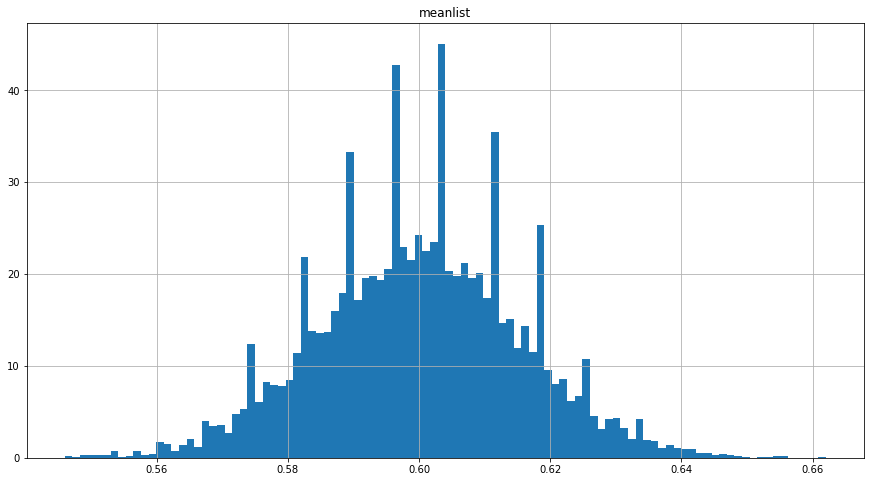

In [15]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 1000
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))